## 지도학습
* 분류: 이산값 (범주값)
* 회귀 : 연속값(숫자값)

In [1]:
import pandas as pd

In [2]:
data=pd.DataFrame([[2,20],[4,40],[8,80],[9,90]],columns=["시간","성적"],
                  index=["진이","수정","정화","철수"])

In [3]:
data

,시간,성적
진이,2,20
수정,4,40
정화,8,80
철수,9,90


#### 가설함수

In [4]:
h= lambda x,w : w*x

In [6]:
h(3,2)

6

In [9]:
import math

In [10]:
def cost(data, target,weight):
    sum=0 # 총합을 구하기 위한 변수
    n=len(data)
    #최소 제곱법 적용
    for i in range(n):
        sum+= (target[i]-h(data[i],weight))**2
    return math.sqrt(sum)

In [11]:
cost(data['시간'],data['성적'],1)

115.60709320798617

In [12]:
cost(data['시간'],data['성적'],10)

0.0

#### 가중치 변화에 따른 그래프

In [13]:
import numpy as np

In [14]:
w_arr=np.linspace(0,20,50)

In [17]:
result=[]
for w in w_arr:
    c=cost(data['시간'],data['성적'],w)
    result.append(c)

In [19]:
import matplotlib.pyplot as plt

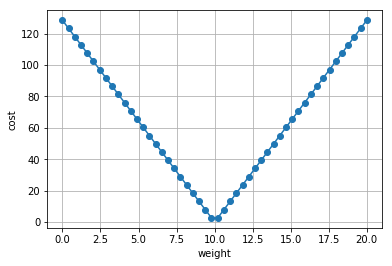

In [20]:
plt.plot(w_arr,result,marker="o")
plt.xlabel("weight")
plt.ylabel("cost")
plt.grid()
plt.show()

#### 데이터에 변화주기

In [21]:
data2=pd.DataFrame([[3,25],[4,43],[7,78],[9,99],[5,13],[6,35]],columns=["시간","성적"])

In [23]:
data2

,시간,성적
0,3,25
1,4,43
2,7,78
3,9,99
4,5,13
5,6,35


In [25]:
result=[]
for w in w_arr:
    c=cost(data2['시간'],data2['성적'],w)
    result.append(c)

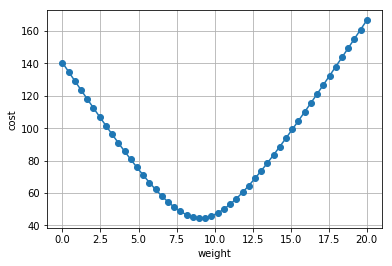

In [26]:
plt.plot(w_arr,result,marker="o")
plt.xlabel("weight")
plt.ylabel("cost")
plt.grid()
plt.show()

## 1. 식의 형식으로 분류
- 선형회귀 : 직선관계를 추정하는 회귀
- 비선형회귀 : 선형이외의 회귀

## 2. 변수의 개수로 분류
- 단순회귀 : 입출력 관계가 변수하나로 구성된 식 y=ax+b
- 다중회귀: 변수를 2개이상쓰는 회귀 y= ax1+ bx2+ cx3+d

In [27]:
# y=3x-2 
x= np.random.rand(100,1) # 0부터 1까지 난수를 100 개 만듬
x=x*4 -2   #값의 범위가 -2~ 2로 변경 
y=3*x -2

In [28]:
from sklearn import linear_model

In [30]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
# 계수와 절편을 표시 
print("계수 :",model.coef_)
print("절편 :", model.intercept_)

계수 : [[3.]]
절편 : [-2.]


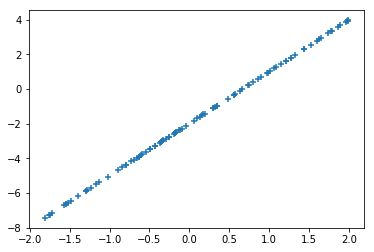

In [32]:
## 그래프 표시 
plt.scatter(x,y,marker='+')
plt.show()

In [33]:
x= np.random.rand(100,1) # 0부터 1까지 난수를 100 개 만듬
x=x*4 -2   #값의 범위가 -2~ 2로 변경 
y=3*x -2
y+= np.random.randn(100,1)# 표준정규분포(평균0, 표준편차1)의 난수를 추가함

In [34]:
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
print("계수 :",model.coef_)
print("절편 :", model.intercept_)

계수 : [[3.03843633]]
절편 : [-2.06042947]


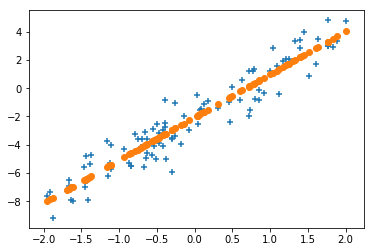

In [36]:
plt.scatter(x,y,marker='+')
plt.scatter(x,model.predict(x),marker='o')
# +는 학습데이터 o는 예측데이터
plt.show()

##  회귀에서 평가 
- 결정계수 R^2 : 실제값의 분산대비 예측값의 분산비율 비율, 1에가까울수록 좋은모델

In [37]:
x= np.random.rand(100,1) # 0부터 1까지 난수를 100 개 만듬
x=x*4 -2   #값의 범위가 -2~ 2로 변경 
y=3*x -2
y+= np.random.randn(100,1)# 표준정규분포(평균0, 표준편차1)의 난수를 추가함

In [38]:
## 학습 
model=linear_model.LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
print("계수 :",model.coef_)
print("절편 :", model.intercept_)
r2=model.score(x,y)
print("결정계수",r2)

계수 : [[2.99179034]]
절편 : [-1.95543027]
결정계수 0.9301237949001664


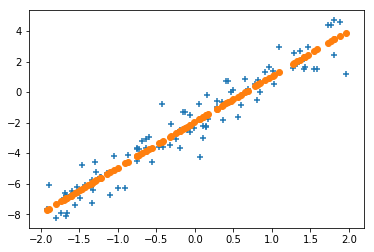

In [40]:
plt.scatter(x,y,marker='+')
plt.scatter(x,model.predict(x),marker='o')
# +는 학습데이터 o는 예측데이터
plt.show()

##  y=a*x^2 +b

In [41]:
x= np.random.rand(100,1) # 0부터 1까지 난수를 100 개 만듬
x=x*4 -2   #값의 범위가 -2~ 2로 변경 
y=3*x**2 -2
y+= np.random.randn(100,1)# 표준정규분포(평균0, 표준편차1)의 난수를 추가함

In [42]:
model=linear_model.LinearRegression()
model.fit(x**2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print("계수 :",model.coef_)
print("절편 :", model.intercept_)
r2=model.score(x**2,y)
print("결정계수",r2)

계수 : [[2.95449796]]
절편 : [-2.00553678]
결정계수 0.9109860470725109


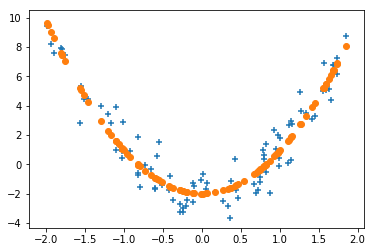

In [45]:
plt.scatter(x,y,marker='+')
plt.scatter(x,model.predict(x**2),marker='o')
# +는 학습데이터 o는 예측데이터
plt.show()